# Unit 3: Linear Transformations and Vector Spaces

1. Linear transformations
1. The matrix of a linear transformation
1. Vector spaces
1. Abstract vector spaces
1. Range, null space, and the other two spaces of a matrix
1. Relationships between the four fundamental subspaces
1. Linearization 
1. Change of variables in multivariate integration


A linear transformation $f: {\mathbb R}^n \to {\mathbb R}^m$ satisfies:

$$
f(\alpha_1 x + \alpha_2 y) = \alpha_1 f(x) + \alpha_2 f(y).
$$

If $A \in {\mathbb R}^{m \times n}$ then $f(x) = Ax$ is a linear transformation.

Proof:  $A \times (\alpha_1 x + \alpha_2 y) = \alpha_1 A x + \alpha_2 A y = \alpha_1 f(x) + \alpha_2 f(y)$ 

Further, for any linear transformation there exists a unique matrix $A$. Proof...

Examples:
* Rotation
* Shear
* Scaling
* Permutations
* Row operations

In [1]:
rotMat(\theta) = [cos(θ) -sin(θ);
             sin(θ) cos(θ)]

rotMat (generic function with 1 method)

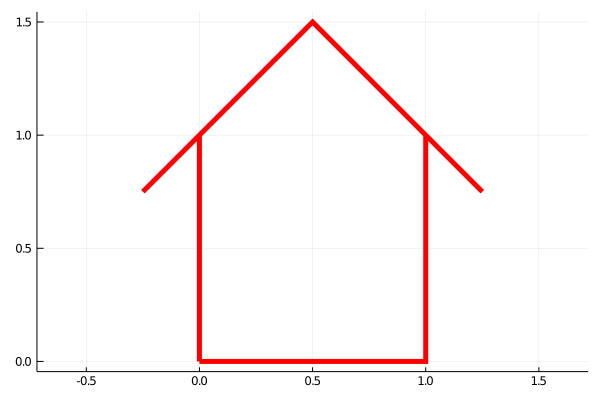

In [3]:
using Plots
house = [
    [0,0],
    [0,1],
    [-0.25,0.75],
    [0.5,1.5],
    [1,1],
    [1.25,0.75],
    [1,1],
    [1,0],
    [0,0]
    ];
plot(first.(house),
    last.(house),
    legend=false,lw = 5,c=:red,aspectratio =1)

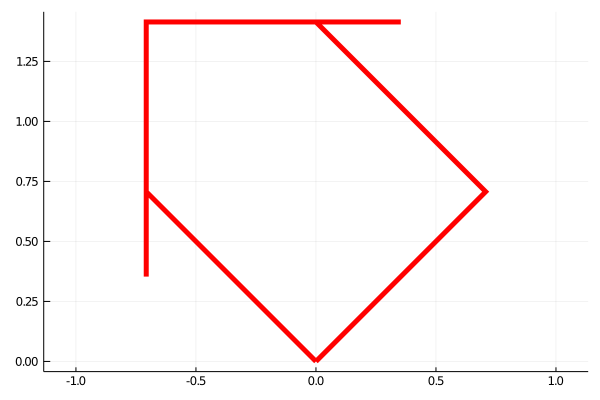

In [5]:
θd = 45 #in degrees
rHouse = [rotMat(deg2rad(θd))*pt for pt in house] #rotate each vector

plot(first.(rHouse),last.(rHouse),legend=false,lw = 5,c=:red,aspectratio =1)

In [7]:
horizontalSheer(m) = [1 m; 
                      0 1]

horizontalSheer (generic function with 1 method)

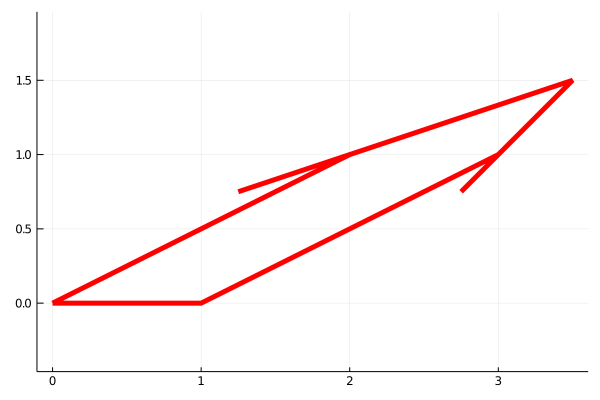

In [12]:
m = 2
sHouse = [horizontalSheer(m)*pt for pt in house]
plot(first.(sHouse),last.(sHouse),legend=false,lw = 5,c=:red,aspectratio =1)

In [13]:
scaling(σ1,σ2) = [σ1 0; 
                  0 σ2]

scaling (generic function with 1 method)

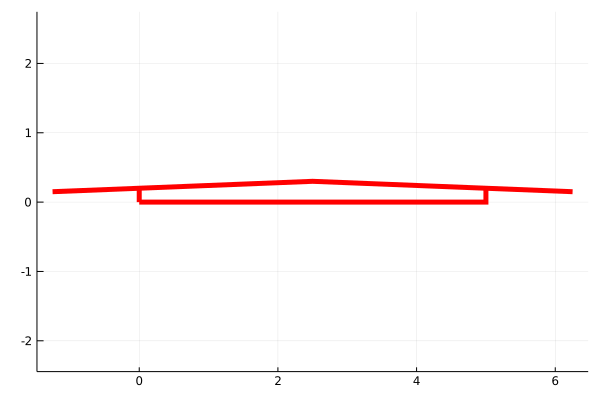

In [14]:
scldHouse = [scaling(5,0.2)*pt for pt in house]
plot(first.(scldHouse),last.(scldHouse),legend=false,lw = 5,c=:red,aspectratio =1)

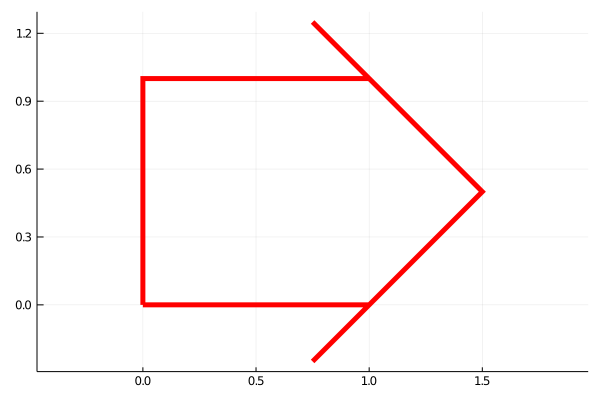

In [15]:
perm = [0 1;
        1 0]
pHouse = [perm*pt for pt in house]
plot(first.(pHouse),last.(pHouse),legend=false,lw = 5,c=:red,aspectratio =1)

## Span

The **span** of a set of vectors $\{v_1,\ldots,v_n\}$ is the set,
$$
\{\alpha_1 v_1 +\ldots +\alpha_n v_n ~|~ \text{for any}~~ \alpha_1,\ldots,\alpha_n \in {\mathbb R} \}
$$

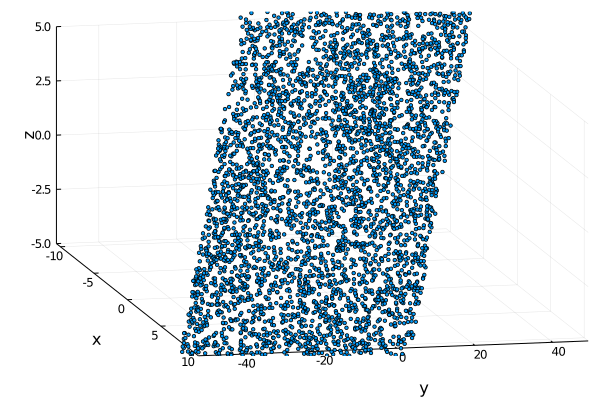

In [22]:
using Plots
v1 = [1, 2 ,1]
v2 = [0, 1, 1]
v3 = [0, 2, 2] #another one

ra() = 20rand()-10 #uniform random number between -10 and 10
N = 10^4
pts = [ra()*v1 + ra()*v2 + ra()*v3
                for _ in 1:N]
scatter(first.(pts),
        (x->x[2]).(pts), #reading second coordinate 
        last.(pts),
    legend=false, camera = (70,45), ms = 2,
    xlabel="x",ylabel= "y",zlabel= "z",zlim=(-5,5))

## Vector Spaces
A set of "vectors" ${\cal V}$ that can be "added" and "multiplied by a scalar" is called a **vector space** if the following axioms hold:

Axioms:

1. Associativity of addition: For any vectors $x,y,z \in {\cal V}$ we have $x+(y+z) = (x+y)+x$.
1. Commutativity of addition: For any vectors $x, y \in {\cal V}$ we have $x+y = y+x$.
1. Identity element of addition: $\exists\, 0 \in {\cal V}$ vector such that $x+0 = x$ for all vectors $x$.
1. Inverse elements of addition: For each $x \in {\cal V}$ there exists a $-x \in {\cal V}$ such that $x +(-x) = 0$.
1. Compatibility of scalar multiplication with field multiplication: For scalars $\alpha, \beta$ and vector $x$, we have $\alpha(\beta x) = (\alpha \beta) x$.
1. Identity element of scalar multiplication: The identity element of scalar multiplication $1$, satisfies $1x = x$ for any vector $x$.
1. Distributivity of scalar multiplication with respect to vector addition: For vectors $x, y$ and scalar $\alpha$ we have $\alpha(x+y) = \alpha x + \alpha y$.  
1. Distributivity of scalar multiplication with respect to field addition: For scalars $\alpha, \beta$ and vector $x$ we have $(\alpha + \beta) x = \alpha x + \beta x$.	

* The set of column vectors in ${\mathbb R}^n$ which we work with throughout this course are a vector space.
* Many more examples (and applications) of vector spaces.
* The zero vector is always an element of the vector space.

To show a subset is a **subspace**, you need to show three things:

1. Show it is closed under addition.
1. Show it is closed under scalar multiplication.
1. Show that the vector 0 is in the subset.

## The range of a matrix (also know as column space)
It is the span of the columns. Sometimes denoted ${\cal C}(A)$ or ${\cal R}(A)$.

$$
f(x) = A x
$$
where $x \in {\mathbb R}^5$ and $f(x) \in {\mathbb R}^3$

In [20]:
someX = [1,2,-3,0,2]
A*someX #an element of R^3

3-element Array{Int64,1}:
  6
 16
 12

In [18]:
using RowEchelon, LinearAlgebra
A = [1 2 3 4 5;
     6 7 8 9 10;
     2 4 6 8 10];
rref(A)

3×5 Array{Float64,2}:
 1.0  0.0  -1.0  -2.0  -3.0
 0.0  1.0   2.0   3.0   4.0
 0.0  0.0   0.0   0.0   0.0

In [19]:
rank(A)

2

$$
A x = b
$$

$$
A \in {\mathbb R}^{3 \times 5},\qquad b \in {\mathbb R}^3
$$

In [ ]:
B = [1 2 3;
     2 4 6;
     3 6 9]

## The null space of a matrix (aka Kernel)
The set of vectors $x$ that solve $A x= 0$. Sometimes denote ${\cal N}(A)$.

In [23]:
A

3×5 Array{Int64,2}:
 1  2  3  4   5
 6  7  8  9  10
 2  4  6  8  10

**Claim: The range of matrix is a subspace.**

**Claim: The null space of matrix is a subspace.**

**"Zero" nullspace** = slang for only $\{0\}$ being the nullspace

**Exercise (claim):** Take any matrix $m \times n$ matrix $A$. Show that ${\cal N}(A) = {\cal N}(A^TA)$.

$
A^TA
$
is
VERY FAMOUS. This is the Gram matrix associated with $A$.

## Linear Independence (see [VMLS] chapter 5)

A set of $n$-vectors $\{v_1,\ldots,v_k\}$ is said to be **linearly independent** if the only scalars $\alpha_1,\ldots,\alpha_k$ that satisfy
$$
\alpha_1 v_1 + \ldots +\alpha_k v_k = 0
$$
are $\alpha_i = 0$ for all $i$.

$$
A \alpha = 0
$$

**Claim**: When a set of vectors is linearly depednent (not linearly independent) then at least one of the vectors can be expressed as a linear combination of the other vectors. 

**Claim**: When a set of vectors $\{v_1,\ldots,v_n\}$ is linearly independent and,
$$
x = \alpha_1 v_1 + \ldots +\alpha_k v_k = 0
$$
Then the coefficients $\alpha_i$ are unique.

In [24]:
[1,2,3,00

4-element Array{Int64,1}:
 1
 2
 3
 0

## Basis

**Theorem:** A linearly independent collection of $n$-vectors (vectors of length $n$) can have at most $n$ elements.

Proof: Page 94 of [VMLS].

A **basis** for a vector space is a set of linearly independent vectors that span the vector space.

**Expansion of a basis**
Take a basis $v_1,\ldots,v_n$ and represent $x = \sum_{i=1}^n \alpha_i v_i$.

In [36]:
x = [1,3,0] #element of R^3

3-element Array{Int64,1}:
 1
 3
 0

In [37]:
b1 = [[1,0,0],[0,1,0],[0,0,1]] #array of arrays (collection of vectors)

3-element Array{Array{Int64,1},1}:
 [1, 0, 0]
 [0, 1, 0]
 [0, 0, 1]

In [38]:
x[1]*b1[1] + x[2]*b1[2] + x[3]*b1[3]

3-element Array{Int64,1}:
 1
 3
 0

In [39]:
b2 = [[1,0,0],[1,1,0]]

2-element Array{Array{Int64,1},1}:
 [1, 0, 0]
 [1, 1, 0]

In [40]:
A = [b2[1] b2[2]]

3×2 Array{Int64,2}:
 1  1
 0  1
 0  0

In [41]:
nullspace(A) #zero nullspace

2×0 Array{Float64,2}

Want $A\alpha = x$

In [42]:
α = A \ x

2-element Array{Float64,1}:
 -2.0000000000000004
  2.9999999999999987

In [43]:
α[1]*b2[1] + α[2]*b2[2]

3-element Array{Float64,1}:
 0.9999999999999982
 2.9999999999999987
 0.0

**Dimension of a vector space**

# The four fundamental subspaces


Nice summary: https://www.math.ucla.edu/~davidjekel/Linear_Algebra/Linear_Algebra_Equivalences.pdf

Also nice: 
https://home.apu.edu/~bmathews/290f10/3_1handout.pdf

Taken from pg 197 [ILA]:

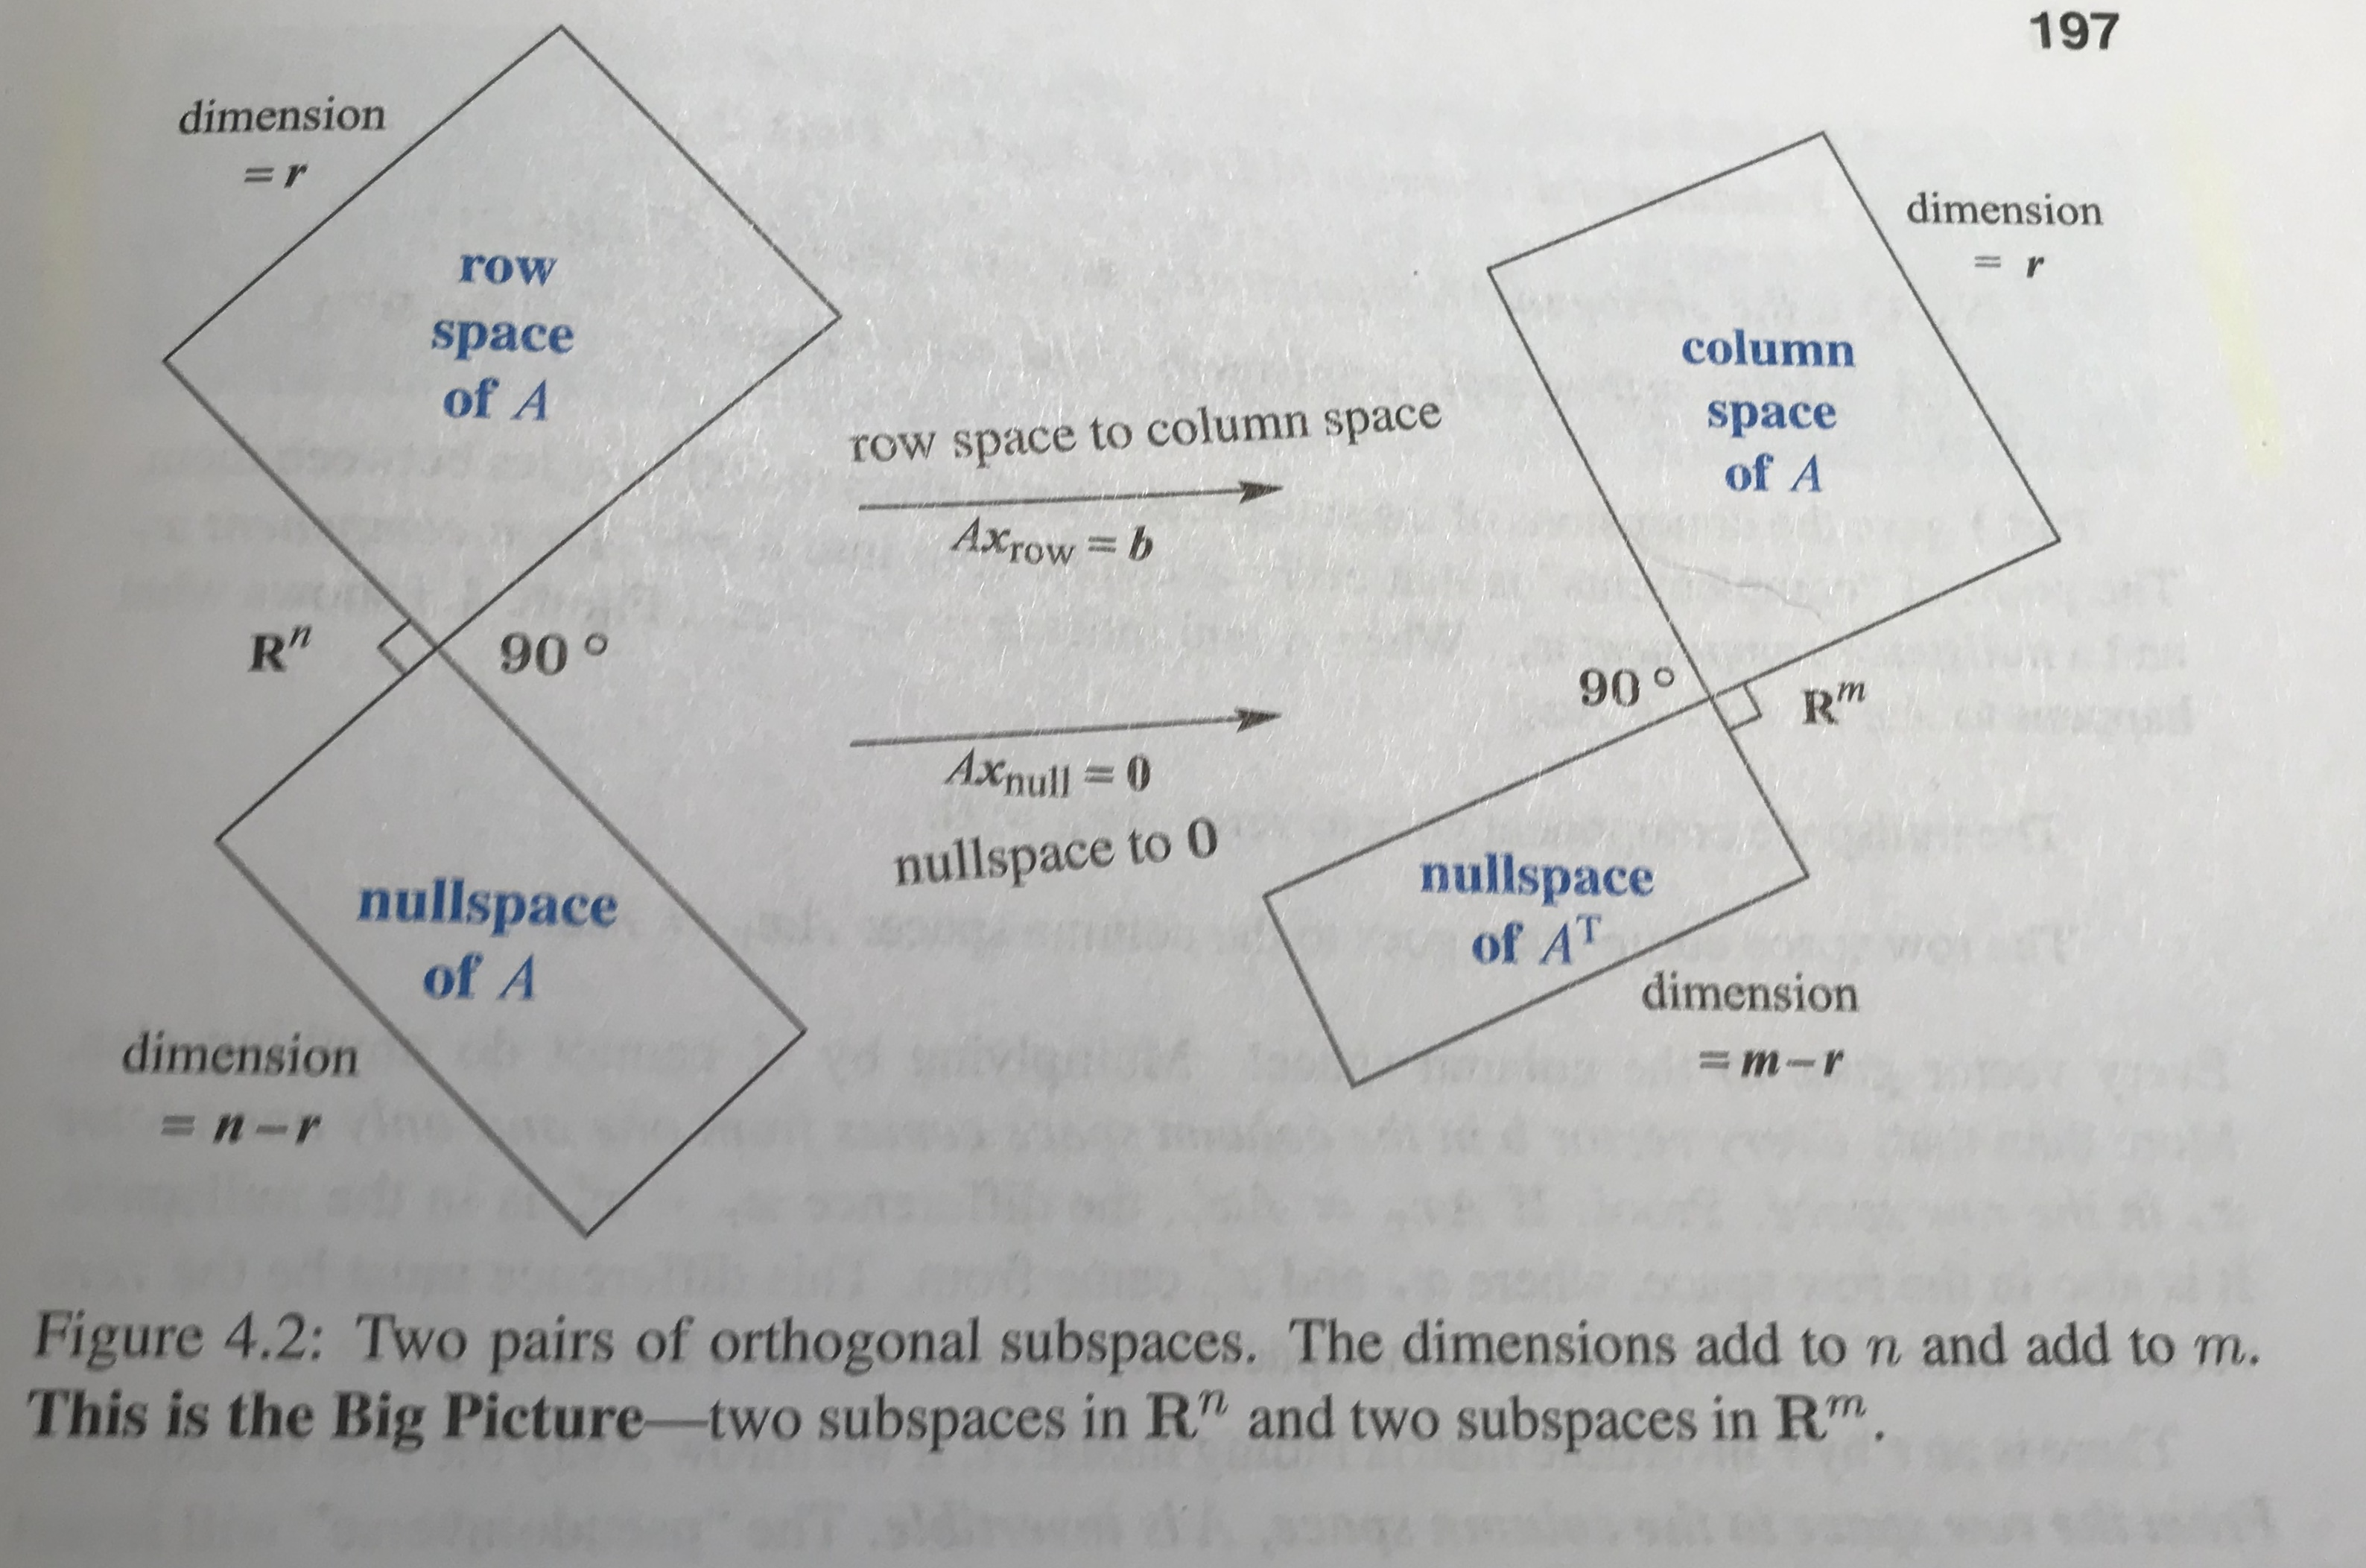

In [44]:
using RowEchelon, LinearAlgebra
A = [1 2 3 4 5;
     6 7 8 9 10;
     2 4 6 8 10];
rref(A)

3×5 Array{Float64,2}:
 1.0  0.0  -1.0  -2.0  -3.0
 0.0  1.0   2.0   3.0   4.0
 0.0  0.0   0.0   0.0   0.0

In [45]:
A'

5×3 Adjoint{Int64,Array{Int64,2}}:
 1   6   2
 2   7   4
 3   8   6
 4   9   8
 5  10  10

# Change of variables in integration

See: https://math.libretexts.org/Courses/Monroe_Community_College/MTH_212_Calculus_III/Chapter_14%3A_Multiple_Integration/14.7%3A_Change_of_Variables_in_Multiple_Integrals_(Jacobians)